\pagebreak
# Data Set Overview

## PidRay

PIDray is a large-scale dataset which covers various cases in real-world scenarios for prohibited item detection, especially for deliberately hidden items. The dataset contains 12 categories of prohibited items in 47, 677 X-ray images with high-quality annotated segmentation masks and bounding boxes.

https://github.com/bywang2018/security-dataset

https://paperswithcode.com/dataset/pidray

## SixRay

With unknown machine specification, this dataset is acquired from subway stations, SIXray dataset comprises 1,059,231 X-ray images, 8929 of which are manually annotated for 6 different classes: gun, knife, wrench, pliers, scissors, hammer, and background. The dataset consists of objects with a wide variety in scale, viewpoint and mostly overlapping, making it a suitable dataset for real-time classification, detection and segmentation applications.

https://github.com/MeioJane/SIXray/blob/master/data_list.txt

https://github.com/MeioJane/SIXray/issues/9

https://github.com/jodumagpi/Xray-ObjSep-v1


## OpixRay Dataset

OPIXray dataset is an airport inspection dataset manually annotated by the security personnel. The dataset comprises 8885 X-ray images (7019 training, 1776 testing) from five sharp objects, including folding knife (1,993), straight knife (1,044), scissor (1,863), utility knife (1,978) and multi-tool knife (2,042).

https://drive.google.com/file/d/12moaa-ylpVu0KmUCZj_XXeA5TxZuCQ3o/view

Y. Wei, R. Tao, Z. Wu, Y. Ma, L. Zhang, X. Liu, Occluded Prohibited Items Detection: An X-ray Security
Inspection Benchmark and De-occlusion Attention Module, in: Proceedings of the 28th ACM International
Conference on Multimedia, ACM, New York, NY, USA, 2020, pp. 138–146.

## GdxRay

Grima X-ray Dataset (GDXRAY) comprises 19, 407 X-ray samples from five various subsets including castings (2, 727), welds (88), baggage (8, 150), natural images (8, 290), and settings (152). The baggage subset is mainly used for security applications and comprises images from multiple-views. The limitation of this dataset is its non-complex content, which is non-ideal to train for real-time deployment.

https://domingomery.ing.puc.cl/material/gdxray/

After some inital data analysis, the Gdxray data set was not further used due to limitations like object classes. Additonally, the pictures were created synthetical and did not match with the original images from X-Ray scans.

\pagebreak 

# Exploratory Data Analysis

In [4]:
# general
import pandas as pd
import numpy as np

# preprocessing
import xml.etree.ElementTree as ET
import io
import os
import matplotlib.pyplot as plt
from PIL import Image

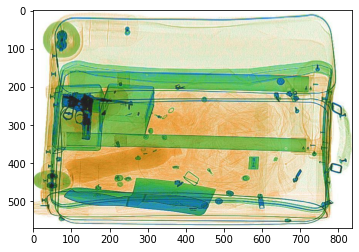

In [5]:
# print a single image (gun on the left)
img = plt.imread('_data/data_ml_final_project/sixray/images/P00011.jpg')
plt.imshow(img)

In [6]:
def get_obj_num():
    obj_num = []
    for i in range(1,8828):
        img_id = 'P'+'0'*(5-len(str(i)))+str(i)
        xml = ET.parse(f'_data/data_ml_final_project/sixray/annotation/{img_id}.xml')
        root = xml.getroot()
        count_obj = 0
        for obj in root.findall('object'):
            if type(obj.find('name')) is not type(None):
                count_obj += 1
        obj_num.append(count_obj)
    return obj_num

In [7]:
# get number of pictures with a specific number (1-10) of objects
nums = get_obj_num()
for i in range(11):
    print(i,": ",nums.count(i))

0 :  21
1 :  4152
2 :  2431
3 :  1174
4 :  501
5 :  416
6 :  93
7 :  17
8 :  5
9 :  16
10 :  1


In [8]:
# create info of each picture and the count for how many objects are in the picture
def create_info_df():
    #df = pd.DataFrame(columns=['Picture_Name','Num_Obj','Num_Gun','Num_Knife','Num_Scissors'])
    info = []
    for i in range(1,8828):
        img_id = 'P'+'0'*(5-len(str(i)))+str(i)
        xml = ET.parse(f'_data/data_ml_final_project/sixray/annotation/{img_id}.xml')
        root = xml.getroot()
        c_gun, c_knife, c_scissors = 0,0,0
        for obj in root.findall('object'):
            if type(obj.find('name')) is not type(None):
                obj_name = obj.find('name').text
                if obj_name == "Gun":
                    c_gun += 1
                elif obj_name == "Knife":
                    c_knife += 1
                elif obj_name == "Scissors":
                    c_scissors += 1
        info.append([img_id+".jpg", c_gun+c_knife+c_scissors, c_gun, c_knife, c_scissors])
    return info

In [9]:
df = pd.DataFrame(create_info_df(), columns=['Picture_Name','Num_Obj','Num_Gun','Num_Knife','Num_Scissors']) 

In [10]:
# get images with only one gun
df_gun_test = df.loc[(df['Num_Obj']==1) & (df['Num_Gun']==1)]

In [11]:
df_gun_test

,Picture_Name,Num_Obj,Num_Gun,Num_Knife,Num_Scissors
795,P00796.jpg,1,1,0,0
967,P00968.jpg,1,1,0,0
972,P00973.jpg,1,1,0,0
973,P00974.jpg,1,1,0,0
979,P00980.jpg,1,1,0,0
...,...,...,...,...,...
3743,P03744.jpg,1,1,0,0
3744,P03745.jpg,1,1,0,0
3745,P03746.jpg,1,1,0,0
3746,P03747.jpg,1,1,0,0


In [12]:
# get images with only one knife
df_knife_test = df.loc[(df['Num_Obj']==1) & (df['Num_Knife']==1)]

In [13]:
df_knife_test

,Picture_Name,Num_Obj,Num_Gun,Num_Knife,Num_Scissors
2,P00003.jpg,1,0,1,0
3,P00004.jpg,1,0,1,0
4,P00005.jpg,1,0,1,0
5,P00006.jpg,1,0,1,0
60,P00061.jpg,1,0,1,0
...,...,...,...,...,...
8520,P08521.jpg,1,0,1,0
8752,P08753.jpg,1,0,1,0
8753,P08754.jpg,1,0,1,0
8754,P08755.jpg,1,0,1,0


Only pictures with one object are useful for training and best case for testing.

\pagebreak

# Pre-Processing

## PidRay


In [ ]:
import json
import pandas as pd

f = open('_data/data_ml_final_project/pidray/train.json')
data = json.load(f)
df_json = pd.DataFrame.from_dict(data["annotations"], orient='columns')
#df_json = pd.DataFrame.from_dict(pd.json_normalize(data), orient='columns')
df_json

In [8]:
# print number of images within chosen classes
df_cat = df_json[df_json["category_id"].isin([2,5,6,7,11])]
df_cat["category_id"].value_counts()

5     4352
6     4350
2     4236
11    3290
7     2178
Name: category_id, dtype: int64

In [10]:
# print number of images with one threat object in chosen classes
df_1 = df_cat.groupby('image_id').filter(lambda x: len(x) == 1)
df_1["category_id"].value_counts()

6     2917
5     2763
2     2622
7     1960
11    1803
Name: category_id, dtype: int64

In [ ]:
print(df_json["categories"])

In [185]:
def pyray_json(init_path,output_path):
    f = open(f'{init_path}.json')
    data = json.load(f)
    df_json = pd.DataFrame.from_dict(data["annotations"], orient='columns')
    df_cat = df_json[df_json["category_id"].isin([2,5,6,7,11])]
    df_1 = df_cat.groupby('image_id').filter(lambda x: len(x) == 1)
    for i in df_1["image_id"]:
        index  = '0'*(5-len(str(i)))+str(i)
        img_path = f'{init_path}/xray_easy{index}.png' # need to be change each time with easy, hard, or hidden
        image= cv2.imread(img_path)
        cv2.imwrite(f'{output_path}/{df_1[df_1["image_id"]==i]["category_id"].values[0]}/{i}.png',image)
    return "done"

In [182]:
# DON'T RUN - images are already created
# pyray_json("_data/data_ml_final_project/pidray/pidray/easy","_data/data_ml_final_project/pidray/pidray/new_easy")

\pagebreak
## SixRay

In [14]:
# crop one image based on the info in the xml file and save it to its specific folder
def crop_image(img,xml):
    root = xml.getroot()
    file_name = root.find('filename').text
    count = 1
    if file_name in set(df_gun_test['Picture_Name']):
        img_save = Image.fromarray(img, 'RGB')
        # greyscale every cropped image
        img_save_grey = img_save.convert('L')
        # save the image in the form of Knife_1_P00001.jpg
        img_save_grey.save(f"_data/data_ml_final_project/sixray/images_test/Gun_{file_name}")
    elif file_name in set(df_knife_test['Picture_Name']):
        img_save = Image.fromarray(img, 'RGB')
        # greyscale every cropped image
        img_save_grey = img_save.convert('L')
        # save the image in the form of Knife_1_P00001.jpg
        img_save_grey.save(f"_data/data_ml_final_project/sixray/images_test/Knife_{file_name}")
    else:
        for obj in root.findall('object'):
            if type(obj.find('name')) is not type(None):
                obj_name = obj.find('name').text
                xmin = int(float(obj.find('bndbox').find('xmin').text))-50
                if(xmin<0):
                    xmin+=50
                xmax = int(float(obj.find('bndbox').find('xmax').text))+50
                ymin = int(float(obj.find('bndbox').find('ymin').text))-50
                if(ymin<0):
                    ymin+=50
                ymax = int(float(obj.find('bndbox').find('ymax').text))+50
                # crop the annotated part out of the image
                img_crop = img[ymin:ymax, xmin:xmax]
                img_save = Image.fromarray(img_crop, 'RGB')
                # greyscale every cropped image
                img_save_grey = img_save.convert('L')
                # save the image in the form of Knife_1_P00001.jpg
                img_save_grey.save(f"_data/data_ml_final_project/sixray/images_crop/{obj_name}/{obj_name}_{count}_{file_name}")
                count += 1

# crop all positive images
def crop_all_images():
    for i in range(1,8828): #8828
        img_id = 'P'+'0'*(5-len(str(i)))+str(i)
        xml = ET.parse(f'_data/data_ml_final_project/sixray/annotation/{img_id}.xml')
        img = plt.imread(f'_data/data_ml_final_project/sixray/images/{img_id}.jpg')
        crop_image(img,xml)
    
# get the name of all classes in the SIXRAY dataset
def get_obj_names():
    obj_all = []
    for i in range(1,8828):
        img_id = 'P'+'0'*(5-len(str(i)))+str(i)
        xml = ET.parse(f'_data/data_ml_final_project/sixray/annotation/{img_id}.xml')
        root = xml.getroot()
        for obj in root.findall('object'):
            if type(obj.find('name')) is not type(None):
                obj_name = obj.find('name').text
                if obj_name not in obj_all:
                    # append unique categories
                    obj_all.append(obj_name)
                    # comment out the creation of folders since it was already done
                    #os.mkdir(f'_data/data_ml_final_project/sixray/images_crop/{obj_name}')
    return obj_all

def get_obj_size():
    obj_all = []
    for i in range(1,8828):
        img_id = 'P'+'0'*(5-len(str(i)))+str(i)
        xml = ET.parse(f'_data/data_ml_final_project/sixray/annotation/{img_id}.xml')
        root = xml.getroot()
        for obj in root.findall('object'):
            if type(obj.find('name')) is not type(None):
                xmin = int(float(obj.find('bndbox').find('xmin').text))
                xmax = int(float(obj.find('bndbox').find('xmax').text))
                ymin = int(float(obj.find('bndbox').find('ymin').text))
                ymax = int(float(obj.find('bndbox').find('ymax').text))
                # create list element for widht, height, size and category of each image
                obj_all.append([xmax-xmin, ymax-ymin, (xmax-xmin)*(ymax-ymin),obj.find('name').text])
    return obj_all
    

In [15]:
# DON'T RUN - cropped images are already created
# crop_all_images()

In [16]:
# get the different categories
get_obj_names()

['Knife', 'Gun', 'Wrench', 'Pliers', 'Scissors']

In [17]:
# create a data frame for the sizes of the images and their categories
data_sizes = pd.DataFrame(get_obj_size())
data_sizes_cust = data_sizes

# possibility to filter
data_sizes_cust = data_sizes[data_sizes[3] == "Gun"]

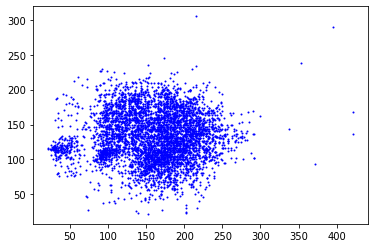

In [18]:
# plot distribution of width and height of the cropped images
plt.figure()
plt.plot(data_sizes_cust[0], data_sizes_cust[1], 'bo', markersize=1)
plt.show()

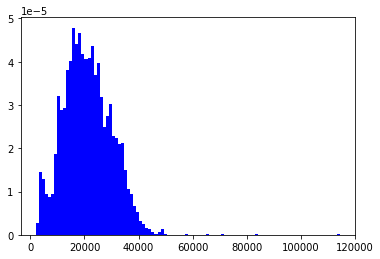

In [19]:
# plt distribution of size of the cropped images
plt.hist(data_sizes_cust[2], density=True, bins=100, color='blue')
plt.show()

In [20]:
# create a data frame for the sizes of the images and their categories
data_sizes = pd.DataFrame(get_obj_size())
data_sizes_cust = data_sizes

# possibility to filter
data_sizes_cust = data_sizes[data_sizes[3] == "Knife"]

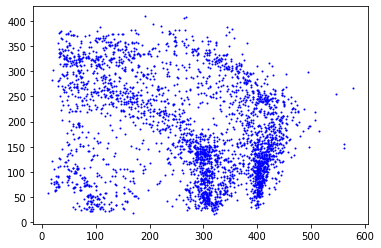

In [21]:
# plot distribution of width and height of the cropped images
plt.figure()
plt.plot(data_sizes_cust[0], data_sizes_cust[1], 'bo', markersize=1)
plt.show()

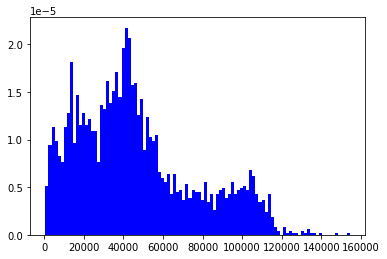

In [22]:
# plt distribution of size of the cropped images
plt.hist(data_sizes_cust[2], density=True, bins=100, color='blue')
plt.show()

\pagebreak
## OpixRay

In [16]:
# crop one image and save it to its specific folder
def crop_image_opixray(img,txt):
    info = open(txt,'r')
    info_read = info.read()
    info_list = info_read.replace('\n',' ').split(' ')
    for i in range(0,int((len(info_list)-1)),6):
        file_name = info_list[i+0]
        obj_name = info_list[i+1]
        xmin = max(int(info_list[i+2]),0)
        xmax = max(int(info_list[i+4]),0)
        ymin = max(int(info_list[i+3]),0)
        ymax = max(int(info_list[i+5]),0)
        # crop the annotated part out of the image
        img_crop = img[ymin:ymax, xmin:xmax]
        img_save = Image.fromarray(img_crop, 'RGB')
        # greyscale every cropped image
        img_save_grey = img_save.convert('L')
        # save the image in the form of Knife_1_0090000.jpg
        #plt.imshow(img_crop)
        #print(obj_name)
        img_save_grey.save(f"_data/data_ml_final_project/opixray/images_crop/{obj_name}/{obj_name}_{i}_{file_name}")

# get the name of the images
def get_img_names_opixray():
    img = open('_data/data_ml_final_project/opixray/_images_train.txt','r')
    img_read = img.read()
    img_names = img_read.replace('\n',' ').split(' ')
    return img_names[:-1]
        
# crop all images
def crop_all_images_opixray():
    for i in get_img_names_opixray():
        txt = f'_data/data_ml_final_project/opixray/annotation/{i}.txt'
        img = plt.imread(f'_data/data_ml_final_project/opixray/images/{i}.jpg')
        crop_image_opixray(img,txt)

# get a list of distinct images categories
def get_obj_names_opixray():
    obj_names = []
    for i in get_img_names_opixray():
        info = open(f'_data/data_ml_final_project/opixray/annotation/{i}.txt','r')
        info_read = info.read()
        info_list = info_read.replace('\n','').split(' ')
        obj_name = info_list[1]
        if obj_name not in obj_names:
            obj_names.append(obj_name)
            #os.mkdir(f'_data/data_ml_final_project/opixray/images_crop/{obj_name}')
    return obj_names

In [17]:
get_obj_names_opixray()

['Straight_Knife',
 'Folding_Knife',
 'Scissor',
 'Utility_Knife',
 'Multi-tool_Knife']

In [18]:
# DON'T RUN - cropped images are already created
#crop_all_images_opixray()